1 x 1 크기의 칸들로 이루어진 직사각형 격자 형태의 미로에서 탈출하려고 합니다. 

각 칸은 통로 또는 벽으로 구성되어 있으며, 벽으로 된 칸은 지나갈 수 없고 통로로 된 칸으로만 이동할 수 있습니다. 

통로들 중 한 칸에는 미로를 빠져나가는 문이 있는데, 이 문은 레버를 당겨서만 열 수 있습니다. 레버 또한 통로들 중 한 칸에 있습니다. 

따라서, 출발 지점에서 먼저 레버가 있는 칸으로 이동하여 레버를 당긴 후 미로를 빠져나가는 문이 있는 칸으로 이동하면 됩니다. 이때 아직 레버를 당기지 않았더라도 출구가 있는 칸을 지나갈 수 있습니다. 

미로에서 한 칸을 이동하는데 1초가 걸린다고 할 때, 최대한 빠르게 미로를 빠져나가는데 걸리는 시간을 구하려 합니다.


미로를 나타낸 문자열 배열 maps가 매개변수로 주어질 때, 미로를 탈출하는데 필요한 최소 시간을 return 하는 solution 함수를 완성해주세요. 만약, 탈출할 수 없다면 -1을 return 해주세요.

maps[i]는 다음 5개의 문자들로만 이루어져 있습니다.

1. S : 시작 지점
2. E : 출구
3. L : 레버
4. O : 통로
5. X : 벽

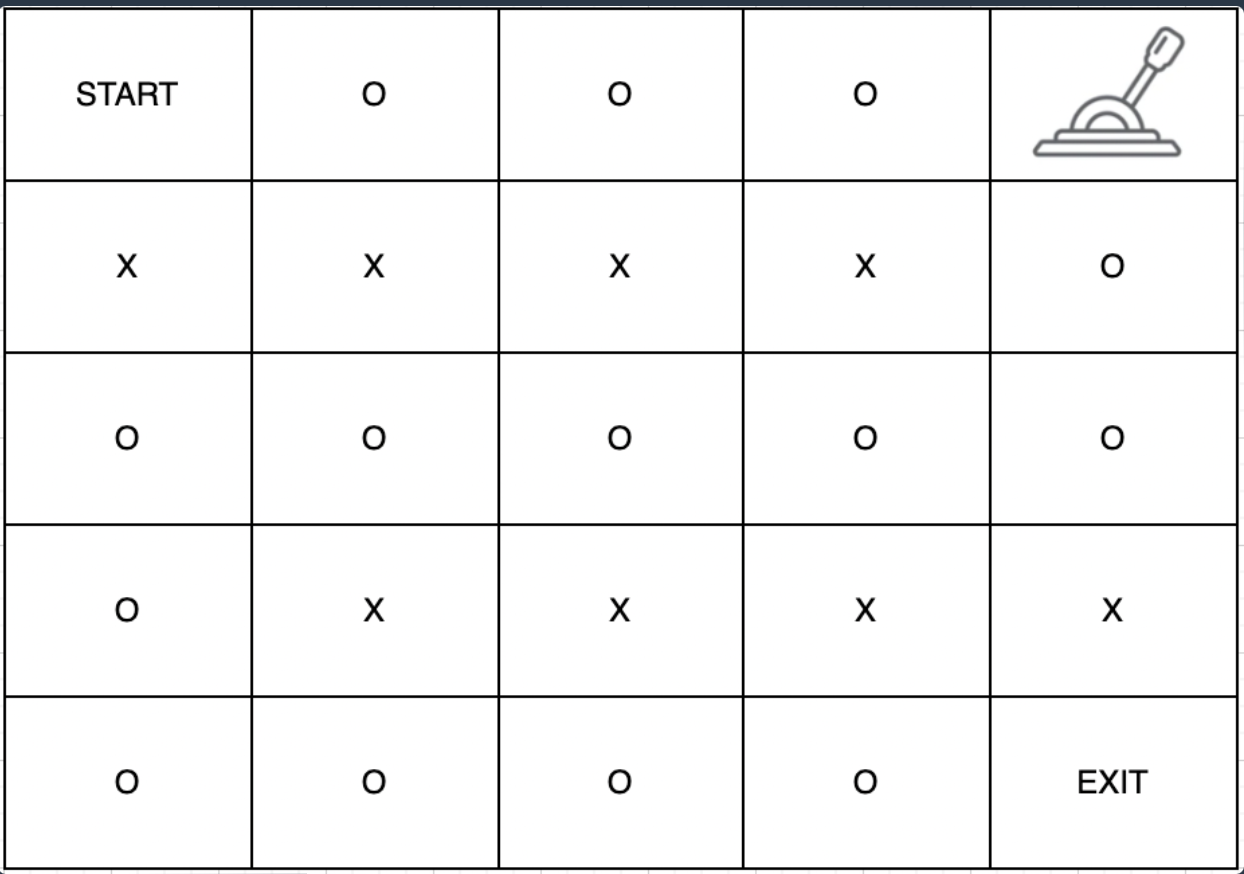

In [8]:
maps = ["SOOOL","XXXXO","OOOOO","OXXXX","OOOOE"]

from collections import deque

def bfs(start, end, maps):

    n = len(maps) # 행
    m = len(maps[0]) # 열

    visited = [[False] * m for _ in range(n)]

    # START 지점 찾기
    for i in range(n):

        for j in range(m):

            if maps[i][j] == start: # START 시작 (start = S or L)

                S_X = i
                S_Y = j
            
            else: continue

    dq = deque([(S_X, S_Y, 0)]) # X, Y, Second

    # 상, 우, 좌, 하
    dx = [-1,0,0,1]
    dy = [0,1,-1,0] 
    while dq:

        x, y, sec = dq.popleft()

        # END 도달 (end = L or E) -> 소요 시간 반환
        if maps[x][y] == end: return sec

        for i in range(4):

            nx = x + dx[i]
            ny = y + dy[i]

            if (0 <= nx < n) and (0 <= ny < m) and (visited[nx][ny] == False) and maps[nx][ny] != "X": # (행 범위) (열 범위) (방문 여부 확인) (통로 여부 확인)
                
                dq.append((nx,ny,sec+1))
                visited[nx][ny] = True # 방문 처리

    return -1

def solution(maps):

    S_L = bfs("S", "L", maps) # 레버까지 경로 찾기
    L_E = bfs("L", "E", maps) # 레버부터 경로 찾기

    if (S_L != -1) and (L_E != -1): # 2가지 모두 경로를 찾을 수 있어야 정상적인 값 반환 가능

        return S_L + L_E
    
    else: # 하나라도 못 찾는 경우 -1
        
        return -1

solution(maps)

16